In [3]:
import pandas as pd
from PIL import Image

In [2]:
!pwd

/Users/barnabykempster/code/zulu-tango/news_and_echo_bubbles/notebooks/BK


In [3]:
df = pd.read_csv("/Users/barnabykempster/code/zulu-tango/news_and_echo_bubbles/raw_data/base_table_2023-12-05.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4430 entries, 0 to 4429
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.3       4430 non-null   int64  
 1   Unnamed: 0.2       4430 non-null   float64
 2   Unnamed: 0.1       4430 non-null   float64
 3   Unnamed: 0         4430 non-null   float64
 4   link               4430 non-null   object 
 5   pdate              4430 non-null   object 
 6   title              4430 non-null   object 
 7   author             4430 non-null   object 
 8   text               4430 non-null   object 
 9   article_length     4430 non-null   int64  
 10  urls               4430 non-null   object 
 11  pre_process_text   4430 non-null   object 
 12  5_step_classifier  4430 non-null   float64
 13  lemmatize          4430 non-null   object 
 14  keywords           4430 non-null   object 
 15  pred_class         4430 non-null   object 
dtypes: float64(4), int64(2),

In [4]:
import ast

In [6]:
df.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,link,pdate,title,author,text,article_length,urls,pre_process_text,5_step_classifier,lemmatize,keywords,pred_class
0,0,0.0,0.0,0.0,https://www.theatlantic.com/ideas/archive/2023...,2023-12-01,Ron DeSantis Debates His Grievances,['David Frum'],"For Gavin Newsom, the TV exposure had a clear ...",1240,www.theatlantic.com,For Gavin Newsom the TV exposure had a clear ...,-2.0,"for gavin newsom, the tv exposure had a clear ...","{'desantis': 0.576, 'newsom': 0.526, 'fox': 0....",left
1,1,1.0,1.0,1.0,https://www.theatlantic.com/ideas/archive/2023...,2023-12-01,Inflation Is Your Fault,['Annie Lowrey'],"You would think, with prices as high as they a...",918,www.theatlantic.com,You would think with prices as high as they a...,-2.0,"you would think, with price a high a they are,...","{'consumer': 0.313, 'price': 0.297, 'spending'...",leans left
2,2,2.0,2.0,2.0,https://www.theatlantic.com/ideas/archive/2023...,2023-12-01,What Kissinger Didn’t Understand,['George Packer'],Henry Kissinger spent half a century pursuing ...,1170,www.theatlantic.com,Henry Kissinger spent half a century pursuing ...,-2.0,henry kissinger spent half a century pursuing ...,"{'kissinger': 0.672, 'wa': 0.21, 'human': 0.12...",left
3,3,3.0,3.0,3.0,https://www.theatlantic.com/ideas/archive/2023...,2023-12-01,What If Americans Are Happy at Work?,['Derek Thompson'],"This is Work in Progress, a newsletter about w...",1193,www.theatlantic.com,This is Work in Progress a newsletter about w...,-2.0,"this is work in progress, a newsletter about w...","{'worker': 0.326, 'work': 0.259, 'journal': 0....",left
4,4,4.0,4.0,4.0,https://www.theatlantic.com/ideas/archive/2023...,2023-12-01,Meet the Super SPAC,['Elliot Ackerman'],One of the greatest obstacles that an independ...,1110,www.theatlantic.com,One of the greatest obstacles that an independ...,-2.0,one of the greatest obstacle that an independe...,"{'ballot': 0.412, 'candidate': 0.227, 'contrib...",left


In [7]:
for index, row in enumerate(df.keywords):
    df.keywords[index] = ast.literal_eval(df.keywords[index])

mask_ll = df['pred_class'] =='left'
mask_l = df['pred_class'] =='leans left'
mask_c = df['pred_class'] =='centre'
mask_r = df['pred_class'] =='leans right'
mask_rr = df['pred_class'] =='right'
df_ll = df[mask_ll]
df_ll.reset_index(drop=True,inplace=True)
df_l = df[mask_l]
df_l.reset_index(drop=True,inplace=True)
df_c = df[mask_c]
df_c.reset_index(drop=True,inplace=True)
df_r = df[mask_r]
df_r.reset_index(drop=True,inplace=True)
df_rr = df[mask_rr]
df_rr.reset_index(drop=True,inplace=True)

/var/folders/bh/78cvcxtd5gq8cfxcwggycg700000gn/T/ipykernel_4856/3123655471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.keywords[index] = ast.literal_eval(df.keywords[index])
/var/folders/bh/78cvcxtd5gq8cfxcwggycg700000gn/T/ipykernel_4856/3123655471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.keywords[index] = ast.literal_eval(df.keywords[index])
/var/folders/bh/78cvcxtd5gq8cfxcwggycg700000gn/T/ipykernel_4856/3123655471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [8]:
df_ll.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,link,pdate,title,author,text,article_length,urls,pre_process_text,5_step_classifier,lemmatize,keywords,pred_class
0,0,0.0,0.0,0.0,https://www.theatlantic.com/ideas/archive/2023...,2023-12-01,Ron DeSantis Debates His Grievances,['David Frum'],"For Gavin Newsom, the TV exposure had a clear ...",1240,www.theatlantic.com,For Gavin Newsom the TV exposure had a clear ...,-2.0,"for gavin newsom, the tv exposure had a clear ...","{'desantis': 0.576, 'newsom': 0.526, 'fox': 0....",left
1,2,2.0,2.0,2.0,https://www.theatlantic.com/ideas/archive/2023...,2023-12-01,What Kissinger Didn’t Understand,['George Packer'],Henry Kissinger spent half a century pursuing ...,1170,www.theatlantic.com,Henry Kissinger spent half a century pursuing ...,-2.0,henry kissinger spent half a century pursuing ...,"{'kissinger': 0.672, 'wa': 0.21, 'human': 0.12...",left
2,3,3.0,3.0,3.0,https://www.theatlantic.com/ideas/archive/2023...,2023-12-01,What If Americans Are Happy at Work?,['Derek Thompson'],"This is Work in Progress, a newsletter about w...",1193,www.theatlantic.com,This is Work in Progress a newsletter about w...,-2.0,"this is work in progress, a newsletter about w...","{'worker': 0.326, 'work': 0.259, 'journal': 0....",left
3,4,4.0,4.0,4.0,https://www.theatlantic.com/ideas/archive/2023...,2023-12-01,Meet the Super SPAC,['Elliot Ackerman'],One of the greatest obstacles that an independ...,1110,www.theatlantic.com,One of the greatest obstacles that an independ...,-2.0,one of the greatest obstacle that an independe...,"{'ballot': 0.412, 'candidate': 0.227, 'contrib...",left
4,5,5.0,5.0,5.0,https://www.theatlantic.com/photo/2023/12/phot...,2023-12-05,"Photos of the Week: Origami Mosaic, Ice Web, M...",['Alan Taylor'],"The Loy Krathong festival in Thailand, a funer...",56,www.theatlantic.com,The Loy Krathong festival in Thailand a funer...,-2.0,"the loy krathong festival in thailand, a funer...","{'parade': 0.278, 'laboratory': 0.278, 'carter...",left


In [9]:
keyword = 'biden'
returned_articles = []
for index, row in enumerate(df_ll.keywords):
    if keyword in row:
        returned_articles.append((df_ll['title'][index],df_ll['pred_class'][index],df_ll['link'][index],df_ll.keywords[index].keys()))
output_df_ll = pd.DataFrame(returned_articles,columns=['title','bias','link','keyword_score'])
output_df_ll = output_df_ll.sort_values(by=['keyword_score'],ascending=False)

returned_articles = []
for index, row in enumerate(df_l.keywords):
    if keyword in row:
        returned_articles.append((df_l['title'][index],df_l['pred_class'][index],df_l['link'][index],df_l.keywords[index].keys()))
output_df_l = pd.DataFrame(returned_articles,columns=['title','bias','link','keyword_score'])
output_df_l = output_df_l.sort_values(by=['keyword_score'],ascending=False)

returned_articles = []
for index, row in enumerate(df_c.keywords):
    if keyword in row:
        returned_articles.append((df_c['title'][index],df_c['pred_class'][index],df_c['link'][index],df_c.keywords[index].keys()))
output_df_c = pd.DataFrame(returned_articles,columns=['title','bias','link','keyword_score'])
output_df_c = output_df_c.sort_values(by=['keyword_score'],ascending=False)

returned_articles = []
for index, row in enumerate(df_r.keywords):
    if keyword in row:
        returned_articles.append((df_r['title'][index],df_r['pred_class'][index],df_r['link'][index],df_r.keywords[index].keys()))
output_df_r = pd.DataFrame(returned_articles,columns=['title','bias','link','keyword_score'])
output_df_r = output_df_r.sort_values(by=['keyword_score'],ascending=False)

returned_articles = []
for index, row in enumerate(df_rr.keywords):
    if keyword in row:
        returned_articles.append((df_rr['title'][index],df_rr['pred_class'][index],df_rr['link'][index],df_rr.keywords[index].keys()))
output_df_rr = pd.DataFrame(returned_articles,columns=['title','bias','link','keyword_score'])
output_df_rr = output_df_rr.sort_values(by=['keyword_score'],ascending=False)

In [10]:
output_df_ll.head()

,title,bias,link,keyword_score
0,Don’t Expect U.S.-China Relations to Get Better,left,https://www.theatlantic.com/international/arch...,"(xi, china, biden, summit, american, chinese, ..."
1,The ‘Anti-Defeat’ Candidate,left,https://www.theatlantic.com/politics/archive/2...,"(biden, said, democrat, president, harris, tru..."
2,Why a Blue-Leaning Swing State Is Getting Redder,left,https://www.theatlantic.com/politics/archive/2...,"(nevada, biden, trump, poll, democrat, voter, ..."
3,Is Biden Toast?,left,https://www.theatlantic.com/politics/archive/2...,"(biden, obama, democrat, trump, voter, preside..."
4,Republicans Can’t Figure It Out,left,https://www.theatlantic.com/politics/archive/2...,"(abortion, voter, yesterday, democrat, virgini..."


In [11]:
output_df_ll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          16 non-null     object
 1   bias           16 non-null     object
 2   link           16 non-null     object
 3   keyword_score  16 non-null     object
dtypes: object(4)
memory usage: 640.0+ bytes


In [12]:
pd.set_option('display.max_colwidth', 1000)

In [13]:
concat_r = pd.concat([output_df_rr,output_df_r],axis=0).reset_index(drop=True)

In [14]:
concat_l = pd.concat([output_df_ll,output_df_l],axis=0).reset_index(drop=True)

In [5]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [16]:
def type_list(df):
    df["keyword_score_list"] = list(df["keyword_score"])
    return df

In [1]:
def get_words(df1,df2,df3,df4,df5):
    big_df = pd.concat([df1,df2,df3,df4,df5],axis=0).reset_index()
    empty_list = []
    string = " "
    for row in df["keyword_score_list"]:
        for elem in row:
            empty_list.append(elem)
    return ' '.join(empty_list)

In [18]:
concat_r = type_list(concat_r)
concat_r['keyword_score'][0]


dict_keys(['newsom', 'admit', 'desantis', 'biden', 'democratic', 'running', 'president', 'gov', 'nov', 'debate'])

In [19]:
words_r = get_words(concat_r)
words_r

'newsom admit desantis biden democratic running president gov nov debate trump classified documents actively supporter usa biden 2022 justice obtained blinken israel israeli reportedly outlet biden war hamas reported meeting biden economy term white house nbc white american address house reportedly hostage hamas american hostages biden pause biden administration leverage conflict administration debate trump biden election presidential president daily caller caller general campaign mortgage inflation rate housing treasury price median fed biden reserve hunter biden york post drive new york york letter hard post content oil price barrel daily caller caller production cut daily biden elevated hunter biden jordan york post new york york russia post daily caller scary biden abc son palestinian president muslim israel lacking suffering reportedly jordan biden house white house speech social medium document white medium social ev lay revolution subsidy green ford vehicle million biden fraud b

In [105]:
ls

BK_scrape_Monday.ipynb
BK_scrape_friday.ipynb
BK_scrape_saturday.ipynb
BK_scrape_sunday.ipynb
BK_scrape_thurs.ipynb
BK_scrape_tues.ipynb
BK_visuals.ipynb
Screenshot_2023-12-05_at_16.51.45-removebg-preview.png
Update.otf
all_sides_dict.ipynb
barney_notebook.ipynb
barney_scraping-Copy1.ipynb
barney_scraping.ipynb
barney_sources_pivots.ipynb
centre.png
cowboys_font.otf
data_to_mon_cum.ipynb
left.png
less_certain_publisher.ipynb
right.png
selenium_barney_test.ipynb
towerofsilence.ttf


### RIGHT

In [188]:
mask_r = np.array(Image.open('r_mask.png'))

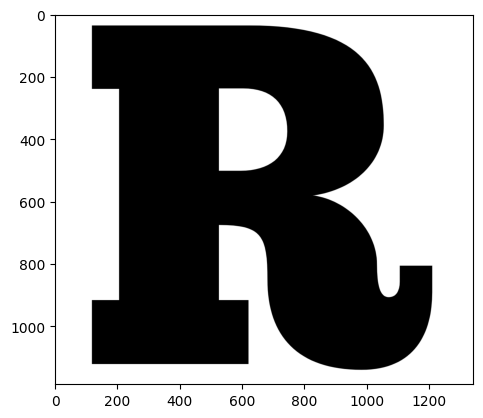

In [189]:
plt.imshow(mask_r)

In [190]:
import matplotlib.pyplot as plt

In [195]:
wordcloud = WordCloud(mask = mask_r, max_font_size=200, max_words=40, background_color="white", font_path = 'towerofsilence.ttf',
                      collocations=True,colormap = 'coolwarm').generate(words_r) #mode="RGBA", colormap = 'Reds', background_color="rgba(255, 255, 255, 0)"

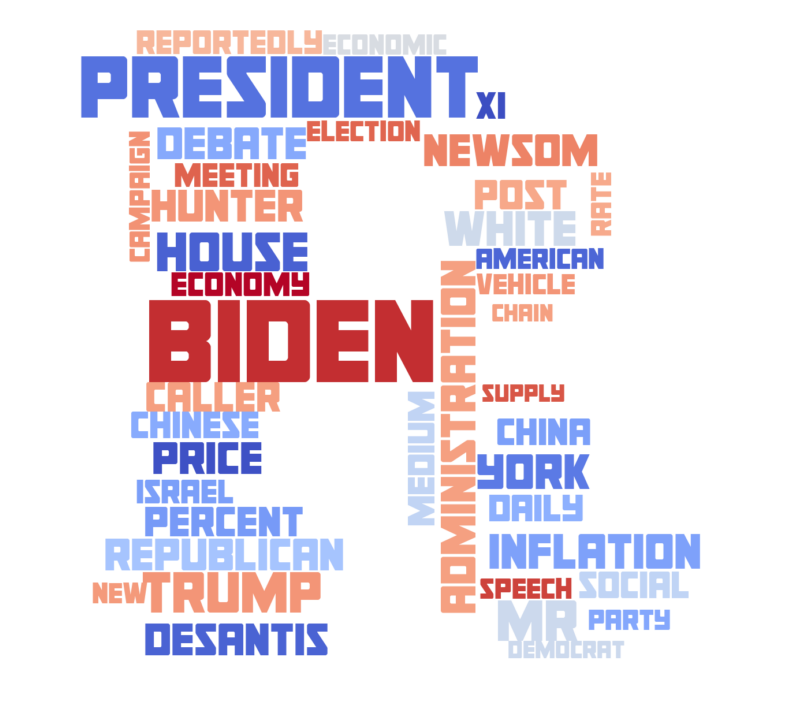

In [196]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.figsize(10,6)
plt.show()

### LEFT

In [178]:
mask_l = np.array(Image.open('l_mask.png'))

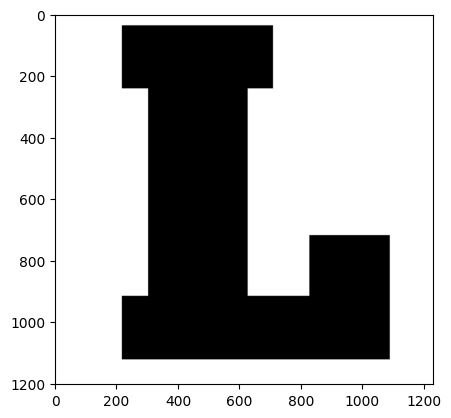

In [179]:
plt.imshow(mask_l)

In [180]:
concat_l = type_list(concat_l)

In [181]:
words_l = get_words(concat_l)

In [197]:
wordcloud_l = WordCloud(mask = mask_l, max_font_size=200, max_words=40, background_color="white", font_path = 'towerofsilence.ttf',
                      collocations=True,colormap = 'coolwarm').generate(words_l) #mode="RGBA", colormap = 'Reds', background_color="rgba(255, 255, 255, 0)"

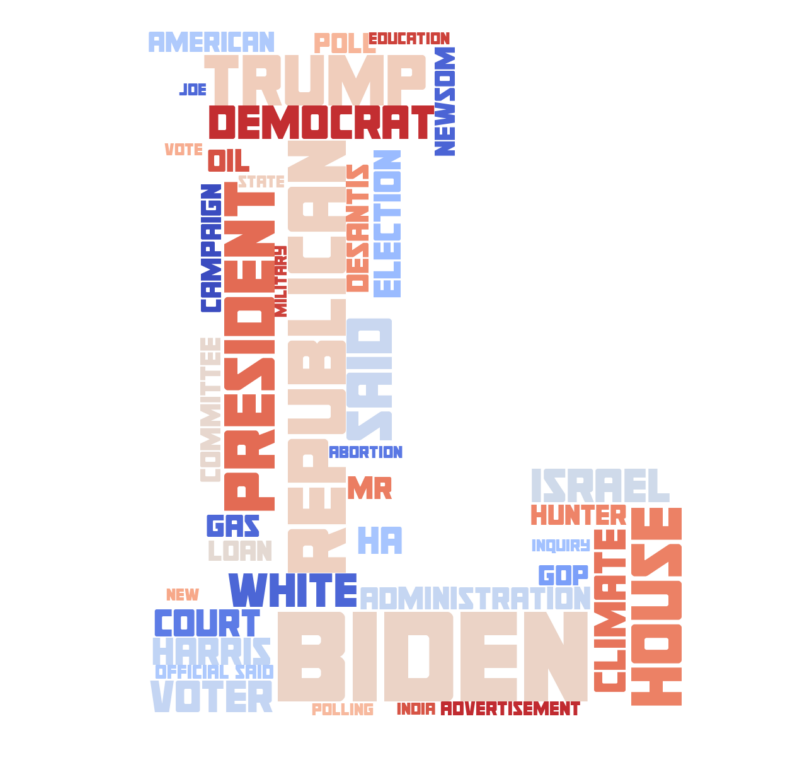

In [198]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud_l, interpolation='bilinear')
plt.axis("off")
# plt.figsize(10,6)
plt.show()

In [8]:
import matplotlib.pyplot as plt

In [1]:
text_dict = {'biden': 0.613, 'economy': 0.195, 'people': 0.192, 
             'white house': 0.16, 'president': 0.15, 'economic': 0.142, 
             'voters': 0.132, 'even': 0.129, 'approval': 0.125, 'house': 0.125}

(-0.5, 399.5, 199.5, -0.5)

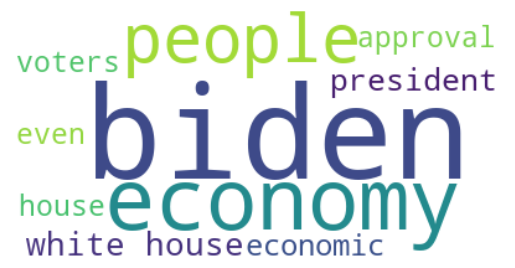

In [10]:
wc = WordCloud(background_color="white", max_words=1000)
# generate word cloud
wc.generate_from_frequencies(text_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()